# Titanic

Se adjunta un dataset sobre el desastre del Titanic para hacer ejercicios libres.

Algunos ejercicios que puedes llegar a realizar son:

* Ver el número de valores nulos
* Representar el porcentaje de filas con atributos nulos.
* Limpieza de columnas.
* Saber la edad mínima y máxima de las personas del barco.
* Conocer la mediana de las edades.
* Ver los precios (columna `fares`) más altos y bajos.
* Número de pasajeros embarcados (columna `Embarked`).
* Ver la distribución de sexos en las personas embarcadas.



In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'/Users/laura/Desktop/Upgrade Hub/DataAnalytics/Contenidos/Modulo1/13_Trabajo_Modulo_1'

In [3]:
df_titanic = pd.read_csv('./streamlit/datos/titanic.csv')

In [4]:
df_titanic


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
print(df_titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [6]:
df_titanic.isnull().sum() # número de valores nulos de cada columna

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_titanic.isnull().sum()/len(df_titanic)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

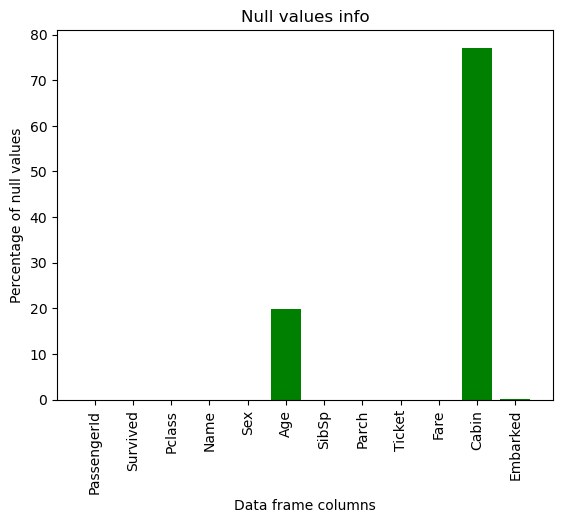

In [8]:
#Representar el porcentaje de atributos nulos por filas.

fig, axes = plt.subplots()

plt.bar(np.arange(len(df_titanic.columns)), df_titanic.isnull().sum()/len(df_titanic)*100, color=['green'])
axes.set_xlabel('Data frame columns')
axes.set_ylabel('Percentage of null values')
axes.set_title('Null values info')
plt.xticks([i for i in range(len(df_titanic.columns))], df_titanic.columns, rotation = 90)
#label = ['n='+str(df_titanic[col].isnull().sum()) for col in df_titanic]
#for i in range(len(df_titanic.columns)):
#    plt.text(x = df_titanic[i]-0.5 , y = df_titanic[i].isnull().sum()+0.1, s = label[i], size = 6);
#for i in range(len(df_titanic.columns)):
#    plt.text(x = df_titanic[i].max(), y = 1, s = label[i], size = 6)
%matplotlib inline

In [9]:
#Limpieza de columnas:
#   como la columna 'Cabin' tiene un 77% de valores nulos, no creo que nos vaya a aportar mucha información. Por lo que la elimino del dataframe

df_titanic.drop(['Cabin'], axis=1, inplace=True)
df_titanic    

#   Puesto que la edad es una variable discreta debería de ser tipo integer y sus valores nulos se podrían sustituir por la mediana de todos los valores. Sin embargo, como la columna 'Age' es tipo float e incluye valores <1 que representan meses de edad se podría utilizar la media de todos los valores para sustituir los nulos, como aparece a continuación:
df_titanic['Age'].fillna(df_titanic['Age'].mean(), inplace=True)

#   en el caso de la columna 'Embarked' que es tipo object se podría utilizar la moda de todos los valores para sustituir los nulos, como aparece a continuación:
df_titanic['Embarked'].fillna(df_titanic['Embarked'].mode()[0], inplace = True)

#compruebo todas las operaciones realizadas anteriormente
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [10]:
#Saber la edad mínima y máxima de las personas del barco.

print('Minimun age of people on board {}'.format(df_titanic['Age'].min()))

print('Maximun age of people on board {}'.format(df_titanic['Age'].max()))

Minimun age of people on board 0.42
Maximun age of people on board 80.0


In [11]:
#Conocer la mediana de las edades.

print('Age median of people on board {}'.format(df_titanic['Age'].median()))


Age median of people on board 29.69911764705882


In [12]:
#Ver los precios (columna `fares`) más altos y bajos.

print('Minimun fare {}'.format(df_titanic['Fare'].min()))

print('Maximun fare {}'.format(df_titanic['Fare'].max()))

Minimun fare 0.0
Maximun fare 512.3292


In [13]:
#Número de pasajeros embarcados (columna `Embarked`).
print('Number of embarked passangers on gate S {}'.format(df_titanic['Embarked'].value_counts()[0]))
print('Number of embarked passangers on gate C {}'.format(df_titanic['Embarked'].value_counts()[1]))
print('Number of embarked passangers on gate Q {}'.format(df_titanic['Embarked'].value_counts()[2]))
print('Total number of embarked passangers {}'.format(df_titanic['Embarked'].value_counts().sum()))

Number of embarked passangers on gate S 646
Number of embarked passangers on gate C 168
Number of embarked passangers on gate Q 77
Total number of embarked passangers 891


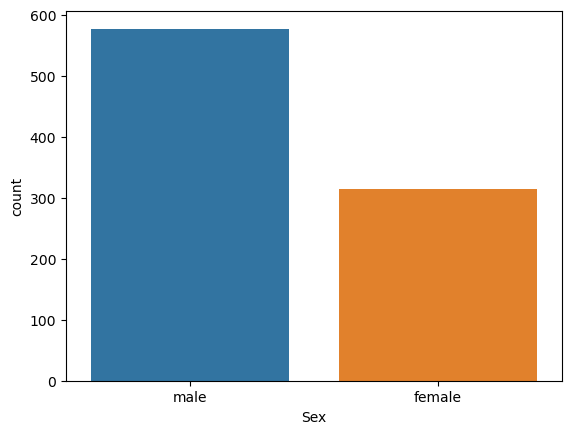

In [14]:
#Ver la distribución de sexos en las personas embarcadas.
sns.countplot(x='Sex',data=df_titanic)
%matplotlib inline

In [15]:
df_titanic.to_csv('./streamlit/datos/titanic_preprocessed.csv', index=False)